In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import os
sns.set()

In [2]:
# api key 0631a61c-1fb3-4391-b372-af0e7b93a30d
from entsoe import EntsoePandasClient

client = EntsoePandasClient(api_key='0631a61c-1fb3-4391-b372-af0e7b93a30d')

In [3]:
time_zones_dict = {'RO': 'Europe/Bucharest',
                   'CZ': 'Europe/Prague',
                   'DE': 'Europe/Berlin',
                   'MK': 'Europe/Skopje',
                   'GR': 'Europe/Athens',
                   'RS': 'Europe/Belgrade'}

In [4]:
# get CEE countries
countries = ['CZ', 'DE', 'GR', 'RO', 'RS']

In [13]:
df_countries = pd.DataFrame()
for each_country in countries:
    start = pd.Timestamp('20150101', tz=time_zones_dict[each_country])
    end = pd.Timestamp('20181231', tz=time_zones_dict[each_country])
    df = client.query_load(each_country, start = start, end = end)
    df = pd.DataFrame(df.groupby(df.index.strftime('%Y-%m-%d')).mean(), columns = [each_country])
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df_countries = pd.concat([df_countries, df], axis = 1)
    print('Done with country '+each_country)
    time.sleep(3)

Done with country CZ
Done with country DE
Done with country GR
Done with country RO
Done with country RS


In [32]:
df_countries = df_countries.loc[df_countries.index<'2018-12-31']
df_countries.tail()

,CZ,DE,GR,RO,RS,CZ,DE,CZ,DE,GR,RO,RS
2018-12-26,6325.333333,47054.937500,5612.083333,6246.913043,5813.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-27,6797.125000,53147.177083,6483.458333,6787.666667,5797.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,6817.500000,52882.854167,6560.041667,7114.208333,5660.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-29,6664.708333,51665.135417,6149.708333,6915.458333,5489.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-30,6646.250000,47598.020833,6131.958333,6607.869565,5418.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_countries = df_countries.iloc[:, 0:5]

In [31]:
df_countries_post2018 = pd.DataFrame()
for each_country in countries:
    start = pd.Timestamp('20181231', tz=time_zones_dict[each_country])
    end = pd.Timestamp('20210101', tz=time_zones_dict[each_country])
    df = client.query_load(each_country, start = start, end = end)
    df = pd.DataFrame(df.groupby(df.index.strftime('%Y-%m-%d')).mean(), columns = [each_country])
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df_countries_post2018 = pd.concat([df_countries_post2018, df], axis = 1)
    print('Done with country '+each_country)
    time.sleep(4)

Done with country CZ
Done with country DE
Done with country GR
Done with country RO
Done with country RS


In [36]:
df_countries = pd.concat([df_countries, df_countries_post2018], axis = 0)

In [38]:
df_countries.tail()

,CZ,DE,GR,RO,RS
2020-12-27,6803.250000,48620.937500,4781.250000,6262.916667,4364.333333
2020-12-28,7193.125000,49675.031250,5177.958333,6872.208333,4540.625000
2020-12-29,7064.791667,49857.447917,5099.166667,6796.625000,4384.750000
2020-12-30,7096.791667,50155.666667,5147.250000,6767.916667,4396.083333
2020-12-31,6732.250000,46738.510417,5348.125000,6562.708333,4248.416667


In [41]:
df_countries_norm = (df_countries - df_countries.mean())/df_countries.std()

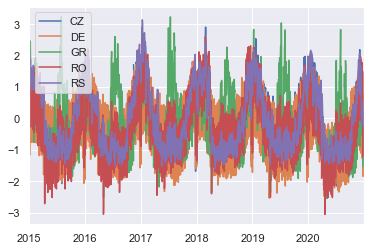

In [43]:
df_countries_norm.plot();

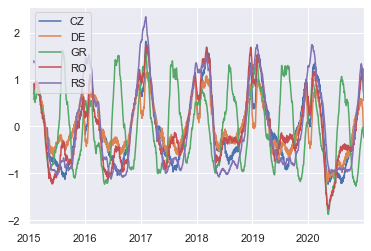

In [44]:
df_countries_norm.rolling(30).mean().plot();

In [45]:
df_countries.to_csv('load_countries.csv')
df_countries.to_pickle('load_countries.pkl')